The dataset used in this project comes from the UCI Machine Learning Repository. This data was collected in 1978 and each of the 506 entries represents aggregate information about 14 features of homes from various suburbs located in Boston.

The features can be summarized as follows:
- CRIM: This is the per capita crime rate by town
- ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
- INDUS: This is the proportion of non-retail business acres per town.
- CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
- NOX: This is the nitric oxides concentration (parts per 10 million)
- RM: This is the average number of rooms per dwelling
- AGE: This is the proportion of owner-occupied units built prior to 1940
- DIS: This is the weighted distances to five Boston employment centers
- RAD: This is the index of accessibility to radial highways
- TAX: This is the full-value property-tax rate per USD 10000
- PTRATIO: This is the pupil-teacher ratio by town
- B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
- LSTAT: This is the percentage lower status of the population
- MEDV: This is the median value of owner-occupied homes in USD 1000 (Target variable Y)

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.datasets import load_boston

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Read the data
X, y = load_boston(return_X_y=True)
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X=pd.DataFrame(X, columns=cols)

In [3]:
#Check the first 5 records
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
#Data Dimensions
X.shape

(506, 13)

- 506 observations
- 13 features 

In [5]:
#Check data type and null values
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [6]:
#Summary Statistics
X.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


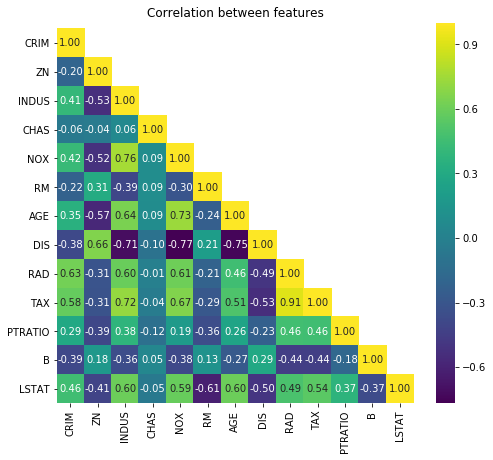

In [7]:
#Check Correlation between features
plt.figure(figsize=(8,7))
ax=sns.heatmap(X.corr(), annot=True, fmt='.2f', mask=np.triu(X.corr()-1), cmap='viridis')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.7)
plt.title("Correlation between features")
plt.show();

The following features have maximum correlation
- Tax rate and accessibility to higways correlate the highest.
- Distance to important centres, nitric oxide levels, proportion of non retail business, Proportion of owner occupied units - have either positive or negative correlation.

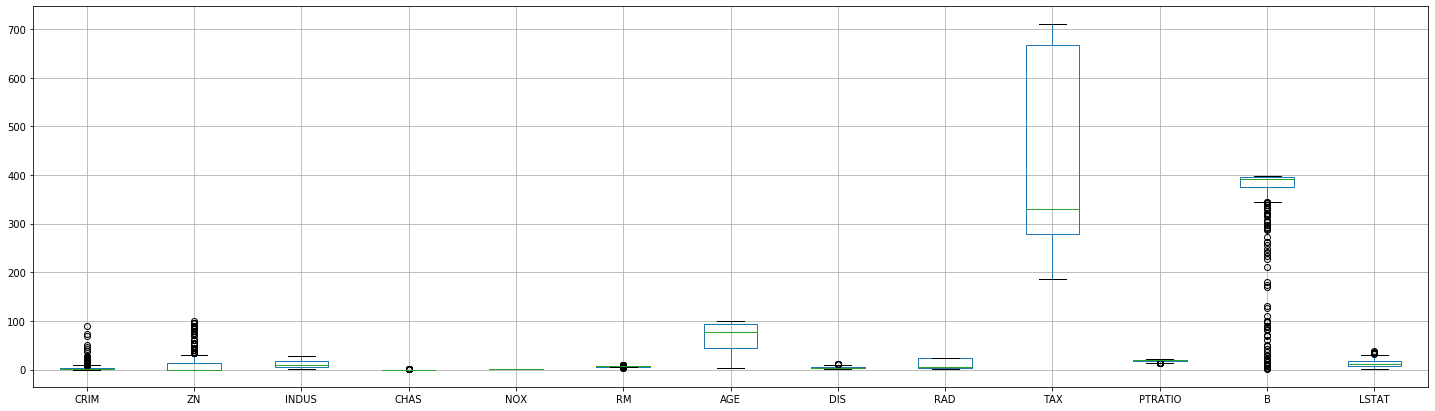

In [8]:
#Check for outliers
plt.figure(figsize=(25, 7))
X.boxplot();

In [9]:
#Percentage of total outliers
q1 = X.quantile(q=0.25)
q3 = X.quantile(q=0.75)
iqr = q3-q1
per_out= round((((X < (q1 - 1.5 * iqr)) |(X > (q3 + 1.5 * iqr))).sum().sum())/X.shape[0]*100,2);
print("Percentage of outliers in the data:", per_out)

Percentage of outliers in the data: 59.88


- Since the outliers are nearly 60%, keeping them as is (for this analysis), since they may carry useful information.
- Outliers can be treated depending on the business expectations.
    

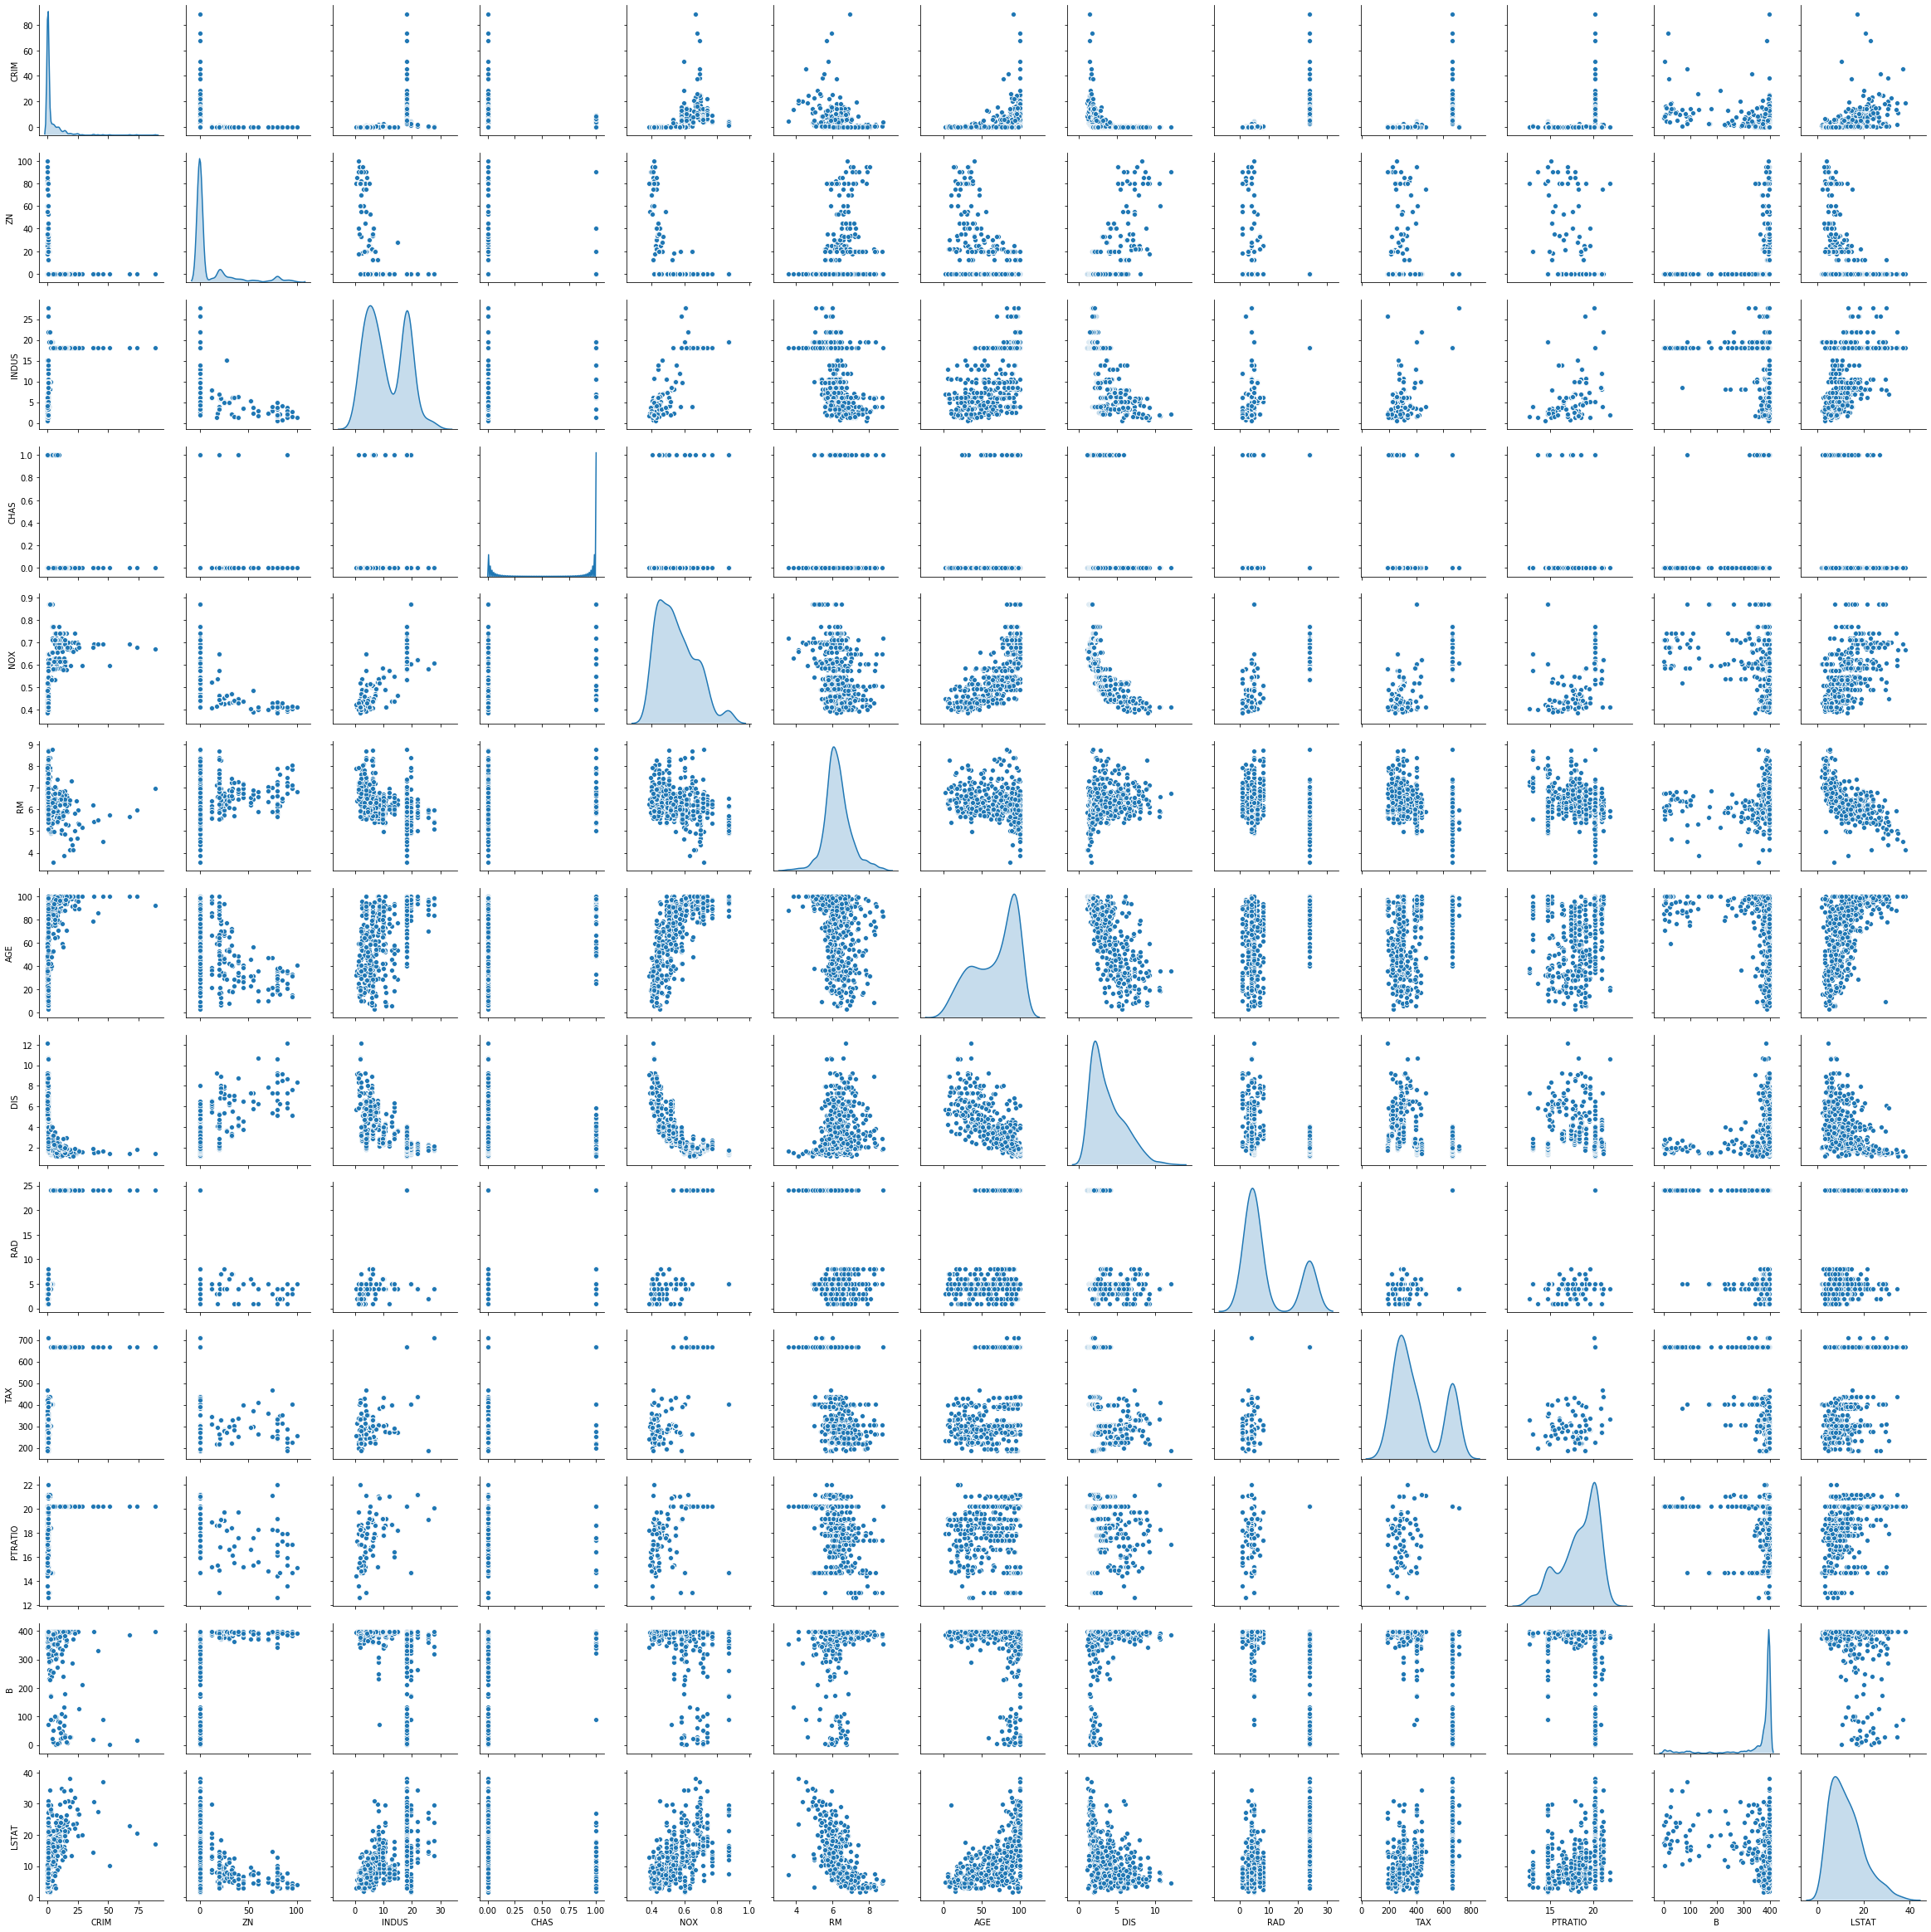

In [10]:
#Bivariate analysis
sns.pairplot(X, diag_kind='kde');

- Similar bivariate, multivariate analysis may be done with all/several features

In [11]:
#Standardize data
X_scaled = X.apply(zscore)
X_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [12]:
#Covariance Matrix
X_cov = round(X_scaled.cov(),2)
X_cov

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.67,-0.31,-0.32,-0.39,0.18,-0.41
INDUS,0.41,-0.53,1.00,0.06,0.77,-0.39,0.65,-0.71,0.60,0.72,0.38,-0.36,0.60
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05
NOX,0.42,-0.52,0.77,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.62
AGE,0.35,-0.57,0.65,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60
DIS,-0.38,0.67,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.50,-0.54,-0.23,0.29,-0.50
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.50,1.00,0.91,0.47,-0.45,0.49
TAX,0.58,-0.32,0.72,-0.04,0.67,-0.29,0.51,-0.54,0.91,1.00,0.46,-0.44,0.55


In [13]:
#Eigen Decomposition
eign_values, eign_vectors = np.linalg.eig(X_cov)
total_eign_values = sum(eign_values)
exp_var = [(i/total_eign_values)*100 for i in sorted (eign_values, reverse=True)] 

print("Explained Variance is the percentage of variability captured by each principal component")
print("Explained Variance for this data is as below: \n")
print(exp_var)
print("\nNearly", round(exp_var[0],2), "% of variability is captured by the first PC")

Explained Variance is the percentage of variability captured by each principal component
Explained Variance for this data is as below: 

[47.22768566002626, 11.07517509869877, 9.521181543788947, 6.603601131509136, 6.431094736564372, 5.061557512287564, 4.099300148485606, 3.0070596615713288, 2.109068343906356, 1.6353445603173782, 1.4086454646557582, 1.3145940681116508, 0.5056920700768858]

Nearly 47.23 % of variability is captured by the first PC


Scree plot representing visually the variance % captured by each PC


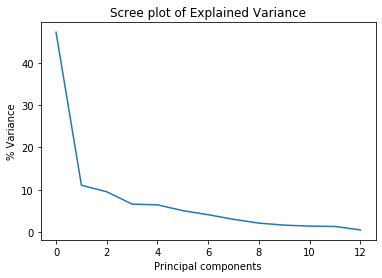

In [14]:
#Scree plot
print("Scree plot representing visually the variance % captured by each PC")
plt.plot(exp_var);
plt.xlabel("Principal components");
plt.ylabel("% Variance");
plt.title("Scree plot of Explained Variance");

In [15]:
#Cumulative Explained Variance
cum_exp_var = np.cumsum(exp_var)
print("Cumulative Variance is the total variance captured from PC1 to the respective principal component")
print("\n Cumulative variance captured by all the 13 principal components are as below: \n")
print(cum_exp_var) 
print("\nCumulative variance captured by the last PC indicates the sum of variance % of all the PC,\n that is, it captured the total variance in the data, which is 100%")
print("\n")
print("Say, for eg. \n Cumulative Variance captured by PC4 = % Variance captured by PC1 + % Variance captured by PC2 + % Variance captured by PC3 + % Variance captured by PC4\n")
print(" Cumulative variance captured by PC4 =", round(exp_var[0],2), "+", round(exp_var[1],2),"+", round(exp_var[2],2), "+", round(exp_var[3],2) )
print(" Cumulative Variance captured by PC4 =", round((exp_var[0] + exp_var[1] + exp_var[2] + exp_var[3]),2),"%")
print("\n")
print(" Cumulative Variance captured by PC7 =", round((exp_var[0] + exp_var[1] + exp_var[2] + exp_var[3] + exp_var[4] + exp_var[5] + exp_var[6]),2),"%")

Cumulative Variance is the total variance captured from PC1 to the respective principal component

 Cumulative variance captured by all the 13 principal components are as below: 

[ 47.22768566  58.30286076  67.8240423   74.42764343  80.85873817
  85.92029568  90.01959583  93.02665549  95.13572384  96.7710684
  98.17971386  99.49430793 100.        ]

Cumulative variance captured by the last PC indicates the sum of variance % of all the PC,
 that is, it captured the total variance in the data, which is 100%


Say, for eg. 
 Cumulative Variance captured by PC4 = % Variance captured by PC1 + % Variance captured by PC2 + % Variance captured by PC3 + % Variance captured by PC4

 Cumulative variance captured by PC4 = 47.23 + 11.08 + 9.52 + 6.6
 Cumulative Variance captured by PC4 = 74.43 %


 Cumulative Variance captured by PC7 = 90.02 %


The individual explained variance represents the variance% captured by each PC
Cumulative explained variance represents the total variance% captured upto a specific PC


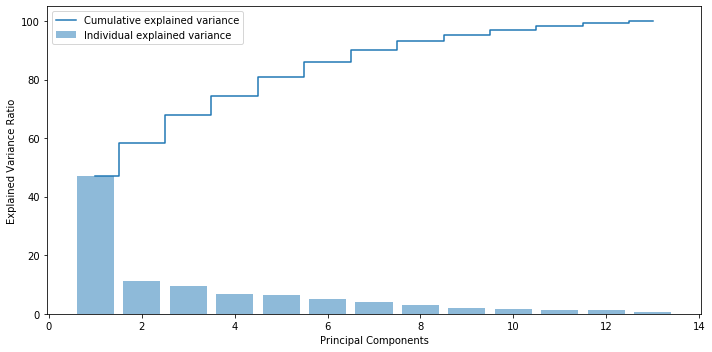

In [16]:
plt.figure(figsize=(10,5))
plt.bar(range(1,eign_values.size+1), exp_var, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1,eign_values.size+1), cum_exp_var, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.tight_layout()

print("The individual explained variance represents the variance% captured by each PC")
print("Cumulative explained variance represents the total variance% captured upto a specific PC")

plt.show()

In [17]:
# Calculating PCA for the 7 derived features
pca = PCA(n_components = 7)
reduced_data = pd.DataFrame(pca.fit_transform(X_scaled))

pca_cols = {"PCA 01", "PCA 02", "PCA 03", "PCA 04", "PCA 05", "PCA 06", "PCA 07"}
reduced_data.columns = sorted(pca_cols)
print("PCA Scores for the 7 derived features are:")
round(reduced_data,2)

PCA Scores for the 7 derived features are:


,PCA 01,PCA 02,PCA 03,PCA 04,PCA 05,PCA 06,PCA 07
0,-2.10,0.77,0.34,-0.89,0.42,-0.32,0.32
1,-1.46,0.59,-0.70,-0.49,-0.20,0.26,0.55
2,-2.07,0.60,0.17,-0.74,-0.93,0.45,0.48
3,-2.61,-0.01,-0.10,-0.34,-1.10,0.66,0.62
4,-2.46,0.10,-0.08,-0.43,-1.07,0.62,0.71
...,...,...,...,...,...,...,...
501,-0.31,0.72,-0.86,-0.43,-1.12,0.51,0.20
502,-0.11,0.76,-1.26,-0.31,-0.89,0.41,0.19
503,-0.31,1.16,-0.41,-0.79,-1.60,0.47,0.29
504,-0.27,1.04,-0.59,-0.68,-1.42,0.48,0.27


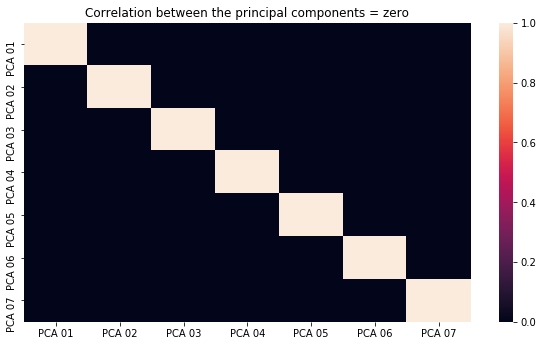

In [18]:
#Correlation between the principal components
plt.figure(figsize=(10,5.5))
ax=sns.heatmap(round(reduced_data.corr(),2))
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.title("Correlation between the principal components = zero");